# Assignment 2
author: Dominika Maciąg 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

# Exercise 1
a) Create and train simple regression model of sqft_living to price.\
b) Evaluate and visualise created model. \
c) Create and plot higher order polynomial regression models.

In [28]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X,y)

LinearRegression(n_jobs=1)

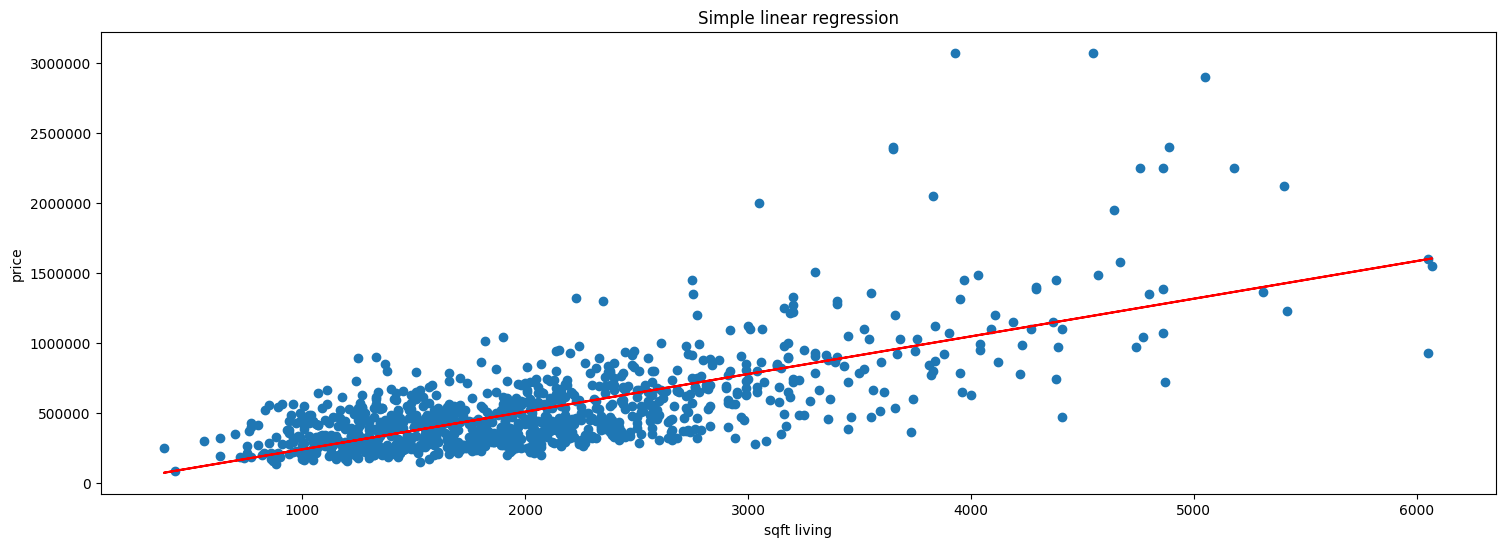

Coefficients:  [269.46205468]
Intercept:  -32304.654721028113
Score:  0.49670880166311393
Mean squared error equals: 57947526161.288376


In [29]:
#b) 

y_pred = model.predict(X)
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(6)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.ticklabel_format(style='plain') 
plt.xlabel("sqft living");
plt.ylabel("price");
plt.title("Simple linear regression")
plt.show()

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Score: ", model.score(X,y))
print("Mean squared error equals:", mean_squared_error(y, y_pred))

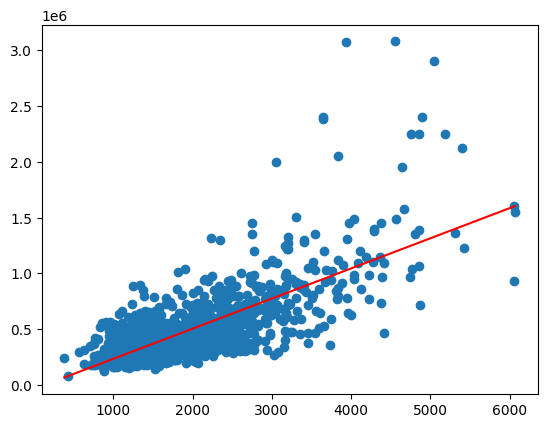

error:  57947526161.28837


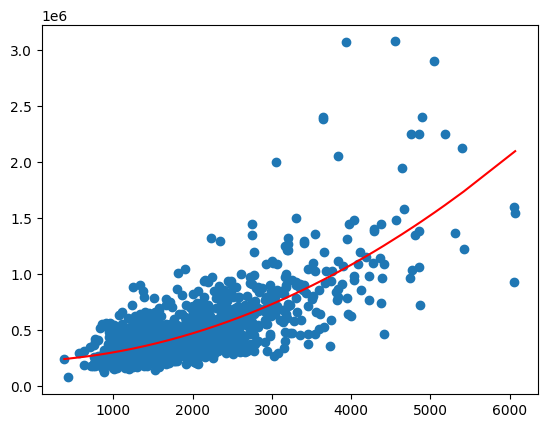

error:  54822665116.27667


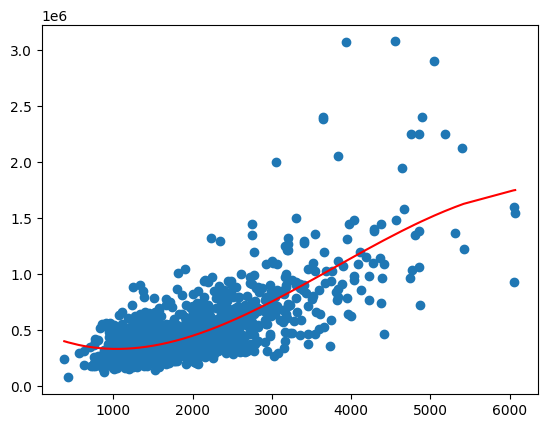

error:  53785194716.49393


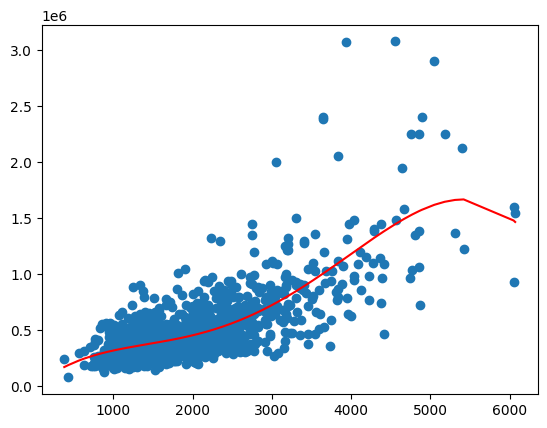

error:  52795774757.64047


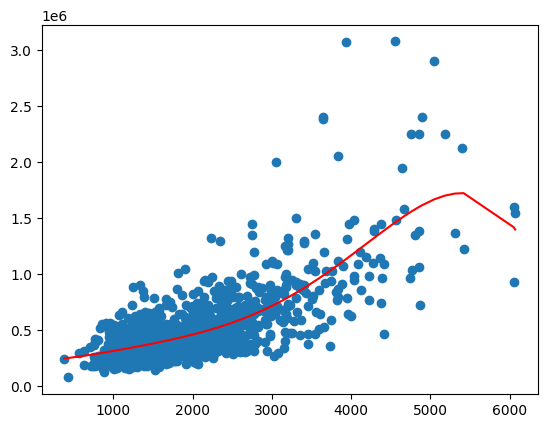

error:  52640881343.124084


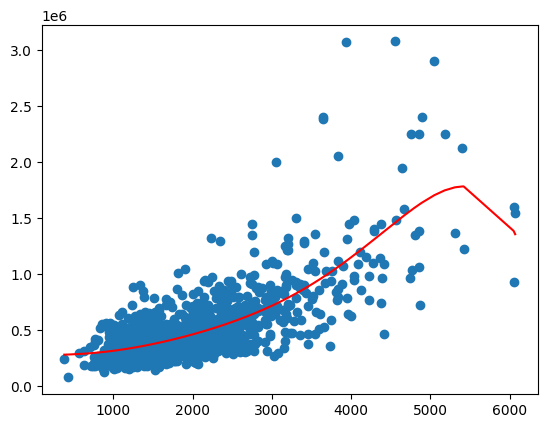

error:  52534037976.51875


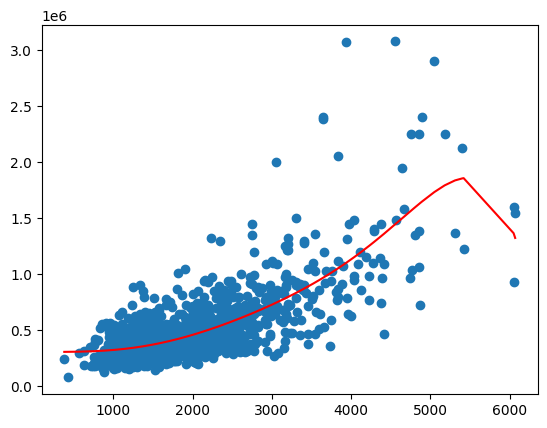

error:  52454788439.714935


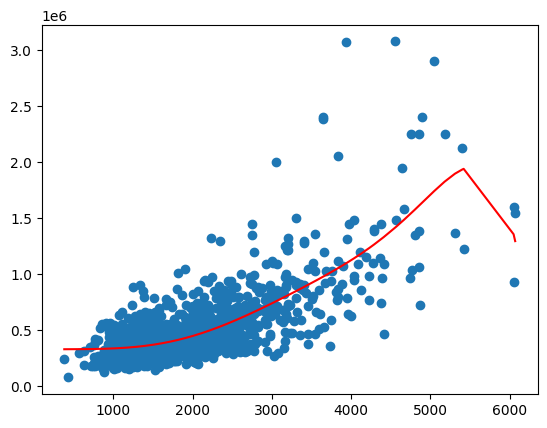

error:  52515109066.85191


In [30]:
#c)

X_sorted = X[X[:, 0].argsort()]
Y_sorted = y[X[:, 0].argsort()]
array = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X_sorted)

    # Visualizing the Polymonial Regression results
    pol = LinearRegression()
    pol.fit(X_order, Y_sorted)
    plt.scatter(X, y)
    Y = pol.predict(poly.fit_transform(X_sorted))
    plt.plot(X_sorted,Y, color="red")
    plt.show()
    
    ##### errors #####
    pred = pol.predict(poly.fit_transform(X))
    array.insert(order, mean_squared_error(y, pred)) 
    print("error: ", mean_squared_error(y, pred))


## Summary
We can observe that visualised results shows that polymonial regression is better at fitting data than linear regression. 
It is especially visible when we use higher order polynomial regression models.
The higher is the degree the better results we get.

## Model performance
To create plot of model performance I used array to store error values that I calculated for each degree.
There are different methods that are used to assess the quality of a regression model.
The one that I used for each degree was - MSE (Mean Squared Error). 
The lower the MSE the better.

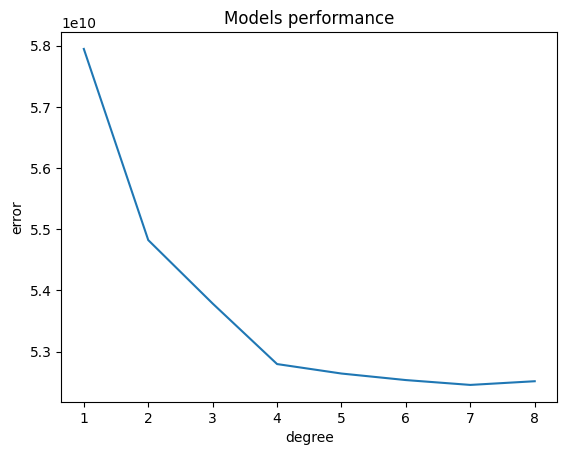

In [31]:
degree = [1,2,3,4,5,6,7,8]
plt.plot(degree,array)
plt.xlabel("degree");
plt.ylabel("error");
plt.title("Models performance")
plt.show()

# Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data. \
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models.

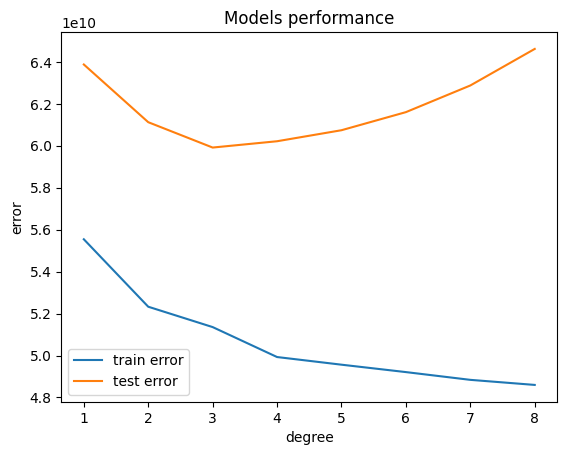

In [32]:
#a)

array_train = []
array_test = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    pol = LinearRegression()
    pol.fit(X_train, y_train)
    
    pol2 = LinearRegression()
    pol2.fit(X_test, y_test)
    
    ##### errors #####
    pred1 = pol.predict(X_train)
    array_train.insert(order, mean_squared_error(y_train, pred1)) 
    # print("error: ", mean_squared_error(y_train, pred1))
    
    pred2 = pol.predict(X_test)
    array_test.insert(order, mean_squared_error(y_test, pred2)) 
    # print("error2: ", mean_squared_error(y_test, pred2))

plt.plot(degree,array_train, label="train error")
plt.plot(degree,array_test, label="test error")
plt.xlabel("degree");
plt.ylabel("error");
plt.title("Models performance")
plt.legend()
plt.show()

## Summary
After we separated data to test data and trained data we can compare their errors on the chart displayed above. We can observe that trained data is more accurate than test data since it doesn't have such high error value. 

# Excercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions. \
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

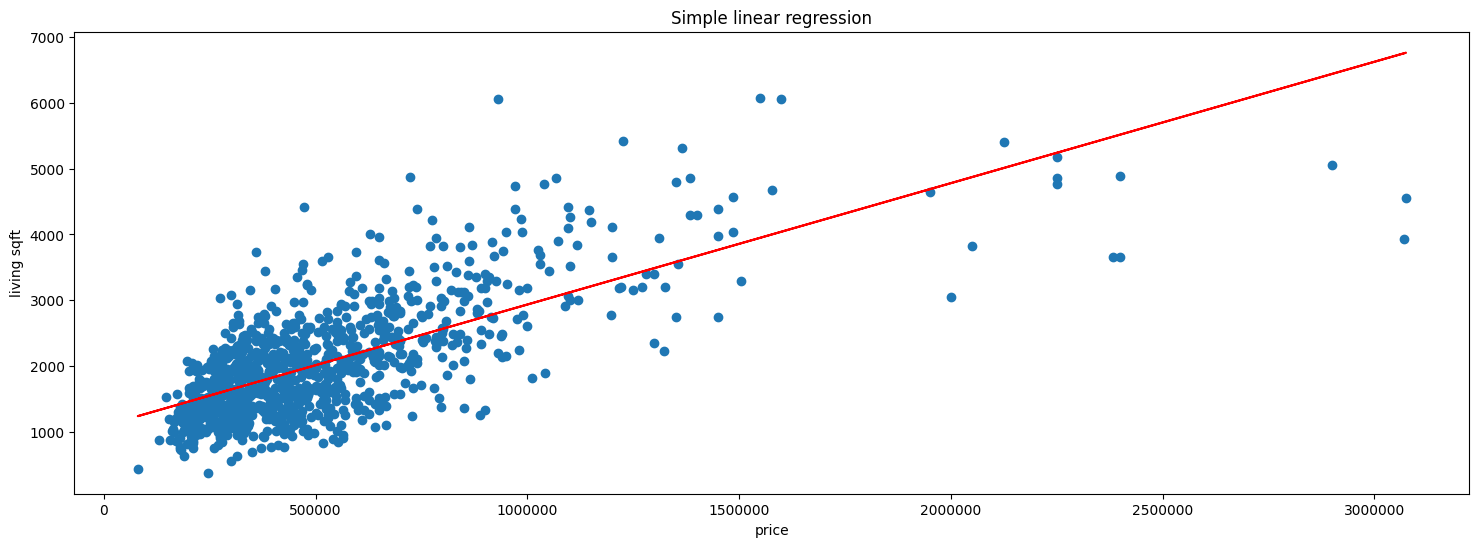

Coefficients:  [0.00184333]
Intercept:  1091.8971893889063
Score:  0.49670880166311404
Mean squared error equals: 396407.1889615157


In [33]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X,y)
y_pred = model.predict(X)

f = plt.figure()
f.set_figwidth(18)
f.set_figheight(6)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.ticklabel_format(style='plain') 
plt.xlabel("price");
plt.ylabel("living sqft");
plt.title("Simple linear regression")
plt.show()

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Score: ", model.score(X,y))
print("Mean squared error equals:", mean_squared_error(y, y_pred))

In [41]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 48749274646.11548


In [40]:
# The model that I propose:
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

# I used trained data for the predictions and for calculation of MSE 
y_pred = model.predict(X_train) 
print("Mean squared error equals: {0}".format(mean_squared_error(y_train, y_pred)))

Mean squared error equals: 45676558687.72225


## Summary
After using trained data instead of test data we can see that we get much better results.  
After switching the data that we use error decreased by 6.3%. \
This dependence can be observed in exercise 2 when we plot difference of error between trained and test data.